In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [8]:
np.random.seed(123)

In [9]:
# true parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# size of dataset
size = 100

x1 = np.random.randn(size)
x2 = np.random.randn(size) * 0.2

y = alpha + beta[0] * x1 + beta[1] * x2 + np.random.randn(size) * sigma

Text(0.5,0,'x2')

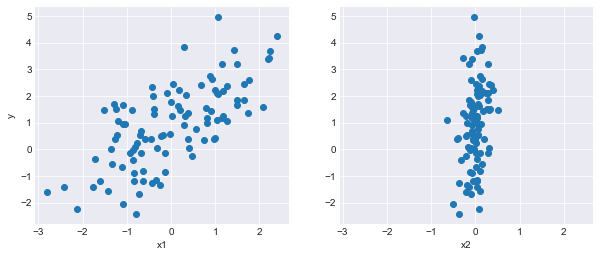

In [10]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(x1, y)
axes[1].scatter(x2, y)
axes[0].set_ylabel('y')
axes[0].set_xlabel('x1')
axes[1].set_xlabel('x2')

In [11]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

print(x1.shape)
print(x2.shape)
print(y.shape)

Running on PyMC3 v3.6
(100,)
(100,)
(100,)


In [12]:
basic_model = pm.Model()
with basic_model:
    # priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # expected value of outcome
    mu = alpha + beta[0] * x1 + beta[1] * x2
    
    # likelihood of observations
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y)
    
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1865.70draws/s]
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [15]:
trace['alpha'][-5:]

array([ 0.97210336,  0.90132618,  0.88223011,  0.95724147,  1.02667202])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c195dc4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c193cb518>]], dtype=object)

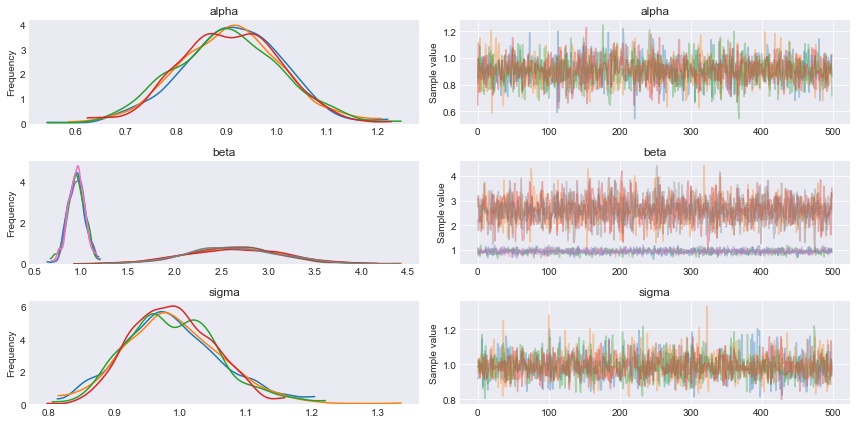

In [16]:
pm.traceplot(trace)

In [17]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.91,0.10,0.00,0.72,1.11,2734.42,1.0
beta__0,0.95,0.09,0.00,0.78,1.14,3047.10,1.0
beta__1,2.62,0.51,0.01,1.61,3.60,2351.19,1.0
sigma,0.99,0.07,0.00,0.85,1.12,2745.94,1.0


In [7]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 137.63it/s] 


{'alpha': array(0.9066009314912588),
 'beta': array([ 0.94848596,  2.60711845]),
 'sigma': array(0.962988576897385),
 'sigma_log__': array(-0.03771372925085048)}

In [8]:
map_estimate = pm.find_MAP(model=basic_model, method='powell')
map_estimate

  0%|          | 0/5000 [00:00<?, ?it/s]/Users/kumada/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/optimize/_minimize.py:381: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -149.47, ||grad|| = 13.248: 100%|██████████| 177/177 [00:00<00:00, 1777.48it/s] 


{'alpha': array(0.9090796395146067),
 'beta': array([ 0.9514399 ,  2.61452795]),
 'sigma': array(0.9656806239373007),
 'sigma_log__': array(-0.034922116477614396)}